In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 🌍 World Population Insights (2022)
### A Data Analysis and Visualization Project

In this project, we analyze global population trends using World Bank data.
We focus on:
- Cleaning and merging datasets
- Exploring key patterns
- Visualizing population by income group, region, and country

In [121]:
pop=pd.read_csv(r"D:\POP & METADATA\API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv", skiprows=4)
meta=pd.read_csv(r"D:\POP & METADATA\Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv")

## 📥 Data Sources
- **Population CSV**: Contains total population from 1960–2024 by country.
- **Metadata CSV**: Contains country code, region, income group, and special notes.

We’ll merge these to enrich our population data with **region** and **income group** info.


In [53]:
pd.set_option('display.max_rows', None)

In [111]:
df=pd.merge(pop, meta, how="left", on="Country Code")

In [113]:
df2=df[["Country Name", "Country Code", "Region", "IncomeGroup", "2022"]]

In [115]:
df2=df2.rename(columns={"2022": "Population_2022"})

In [117]:
df2=df2.dropna(subset=["Population_2022", "Region", "IncomeGroup"])

In [59]:
df2

,Country Name,Country Code,Region,IncomeGroup,Population_2022
0,Aruba,ABW,Latin America & Caribbean,High income,1.073100e+05
2,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,4.057884e+07
4,Angola,AGO,Sub-Saharan Africa,Lower middle income,3.563503e+07
5,Albania,ALB,Europe & Central Asia,Upper middle income,2.777689e+06
6,Andorra,AND,Europe & Central Asia,High income,7.970500e+04
8,United Arab Emirates,ARE,"Middle East, North Africa, Afghanistan & Pakistan",High income,1.007498e+07
9,Argentina,ARG,Latin America & Caribbean,Upper middle income,4.540790e+07
10,Armenia,ARM,Europe & Central Asia,Upper middle income,2.969200e+06
11,American Samoa,ASM,East Asia & Pacific,High income,4.834200e+04
12,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,9.284000e+04


## 🧹 Data Cleaning
- Removed unnecessary columns (like years 1960–2021).
- Renamed 2022 column to `Population_2022` for clarity.
- Dropped rows with missing Region or IncomeGroup to keep analysis meaningful.


In [123]:
region_pop=df2.groupby("Region")["Population_2022"].sum().sort_values(ascending=False)

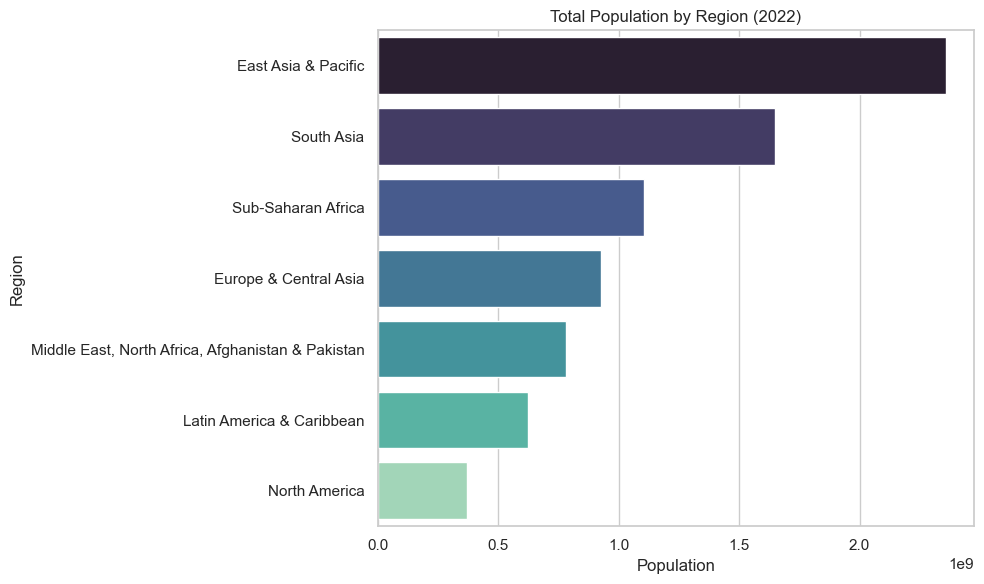

In [70]:
sns.barplot(x=region_pop.values, y=region_pop.index, hue=region_pop.index, palette="mako", legend=False)
plt.title("Total Population by Region (2022)")
plt.xlabel("Population")
plt.ylabel("Region")
plt.tight_layout()
plt.savefig("population_by_region.png", dpi=300)
plt.show()


### 🔍 Insight 1: Population by Region
Asia dominates global population share. This reflects regional concentration and economic pressure.

---


In [75]:
income_pop = df2.groupby("IncomeGroup")["Population_2022"].sum().sort_values(ascending=False)

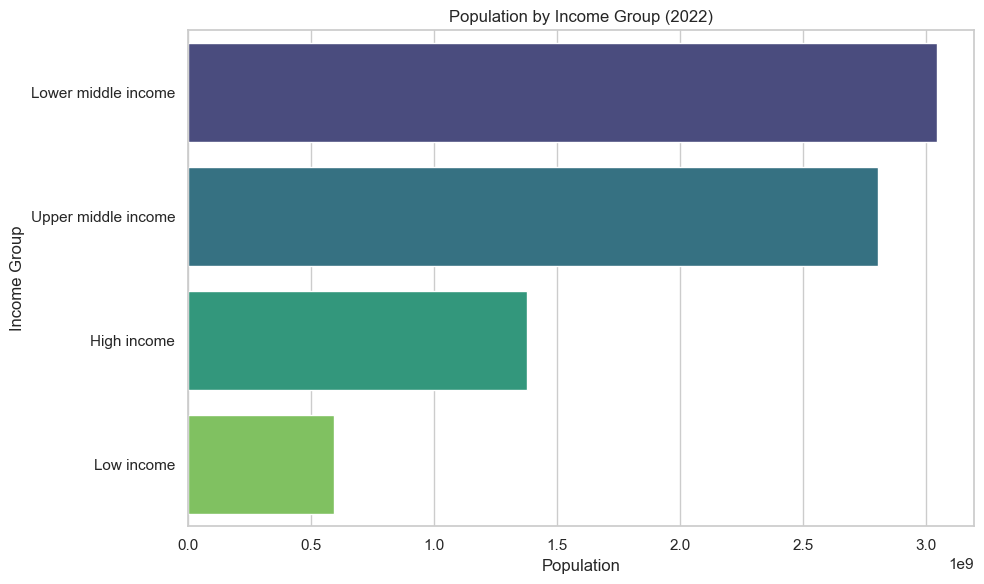

In [81]:
sns.barplot(x=income_pop.values, y=income_pop.index, hue=income_pop.index, palette="viridis", legend=False)
plt.title("Population by Income Group (2022)")
plt.xlabel("Population")
plt.ylabel("Income Group")
plt.tight_layout()
plt.savefig("population_by_income.png", dpi=300)
plt.show()

### 🔍 Insight 2: Income Group vs Population
Lower-middle-income countries have the largest population. This reveals a key development challenge.

---


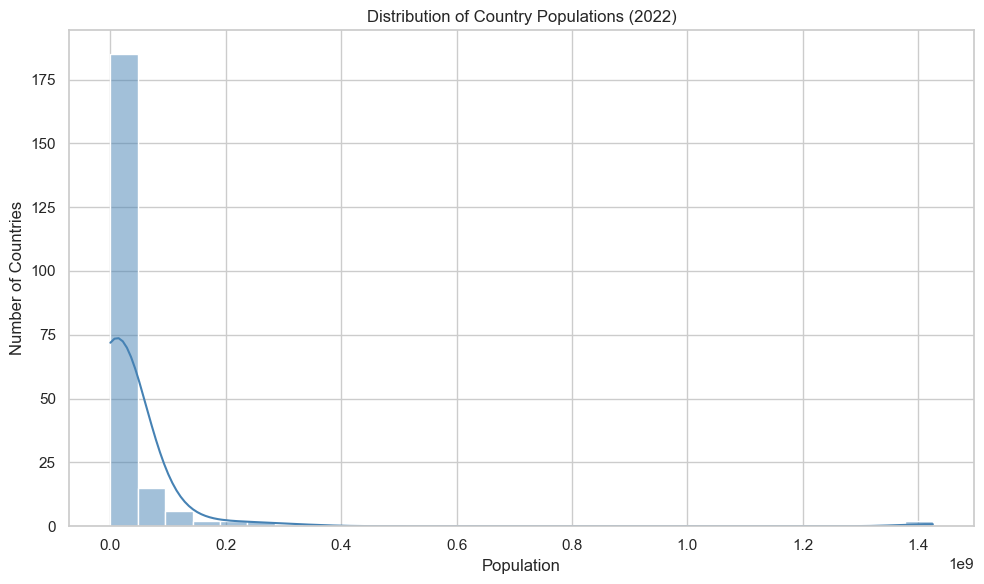

In [94]:
sns.histplot(df2["Population_2022"], bins=30, kde=True, color="steelblue")
plt.title("Distribution of Country Populations (2022)")
plt.xlabel("Population")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.savefig("population_histogram.png", dpi=300)
plt.show()

### 🔍 Insight 3: Population Distribution
Most countries have populations below 100 million. A few outliers (India, China) skew global averages.

---


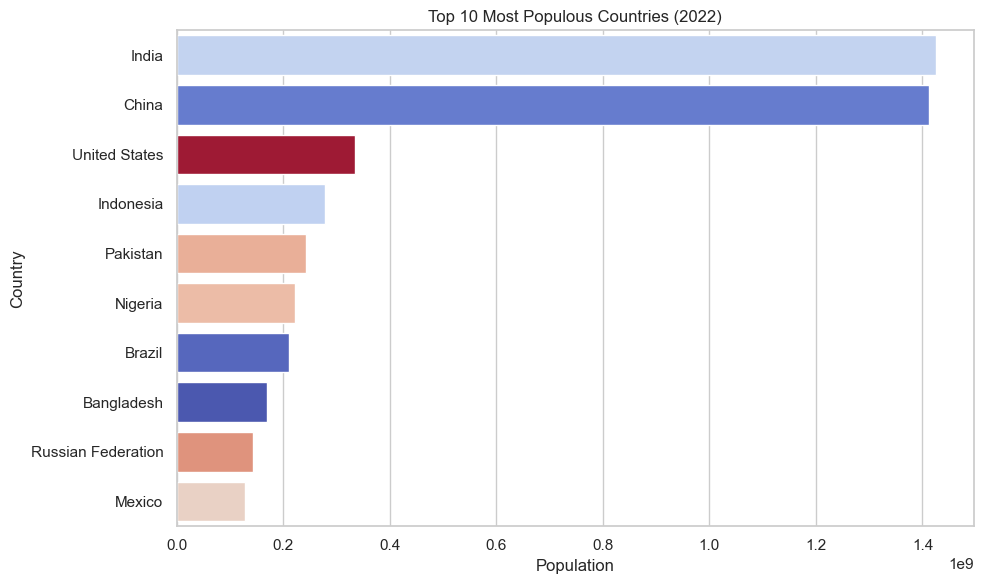

In [105]:
top10 = df2.sort_values("Population_2022", ascending=False).head(10)
sns.barplot(x=top10["Population_2022"], y=top10["Country Name"], hue=top10.index, palette="coolwarm", legend=False)
plt.title("Top 10 Most Populous Countries (2022)")
plt.xlabel("Population")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("top10_countries.png", dpi=300)
plt.show()

### 🔍 Insight 4: Top 10 Countries
India and China are far ahead of others. Understanding this helps in global resource and policy planning.

---


## 🧠 Learnings from the Project

1. **Data Cleaning**: Learned to clean and structure multi-year datasets efficiently.
2. **Data Merging**: Used country codes to combine metadata with core data.
3. **Visualization**: Created four clear visuals — bar charts and histograms.
4. **Insights**: Understood how population differs by region and income.

## 📌 Tools Used
- **Python (Pandas, Seaborn, Matplotlib)** for analysis and plotting
- Charts exported as PNGs for use in PDF report or PowerPoint

## ✅ What this shows:
- Data storytelling
- Code fluency
- Analytical thinking
- Readiness for internships and research roles

---
